# **LB_Analtical_Solutions_Without_Wave_Prop**

---

**Article Title:** Engineering Nonlinear Optical Activation Functions for All-Optical Neural Networks
 

**Authors:**  
- Xinzhe Xu\* (Purdue University)  
- Ruben Canora\* (Purdue University)  

\*Equal contribution  

**Advisors:** 
- Shengwang Du (Advisor, Purdue University)
- Hadiseh Alaeian (Advisor, Purdue University)  


**Date:** November 2024  
**License:** MIT License

---

## **Objective**

This notebook contains simulations and analysis for the research paper "Engineering Nonlinear Optical Activation Functions for All-Optical Neural Networks Based on Three-Level Atomic Ensemble." Specifically, this notebook focuses on modeling the behavior of Electromagnetically Induced Transparency (EIT) in three-level lifetime-broadened atomic **with a weak probe laser beam**. Along with the ground state approximation, we can find an analytical solution to the transparency. The output laser intensities of the probe laser is explored with respect to the coupling laser intensity. When the probe laser intensity is low, we can also ignore the wave propagation effect through the cell.

---


## System Diagram
![Theoretical scheme of a Lambda-L type three-level atomic system](https://www.researchgate.net/publication/348026897/figure/fig1/AS:11431281257720863@1719870514100/a-Theoretical-scheme-of-a-Lambda-L-type-three-level-atomic-system-for-setting-on.jpg)

----

### These are the equations for the density matrix elements 

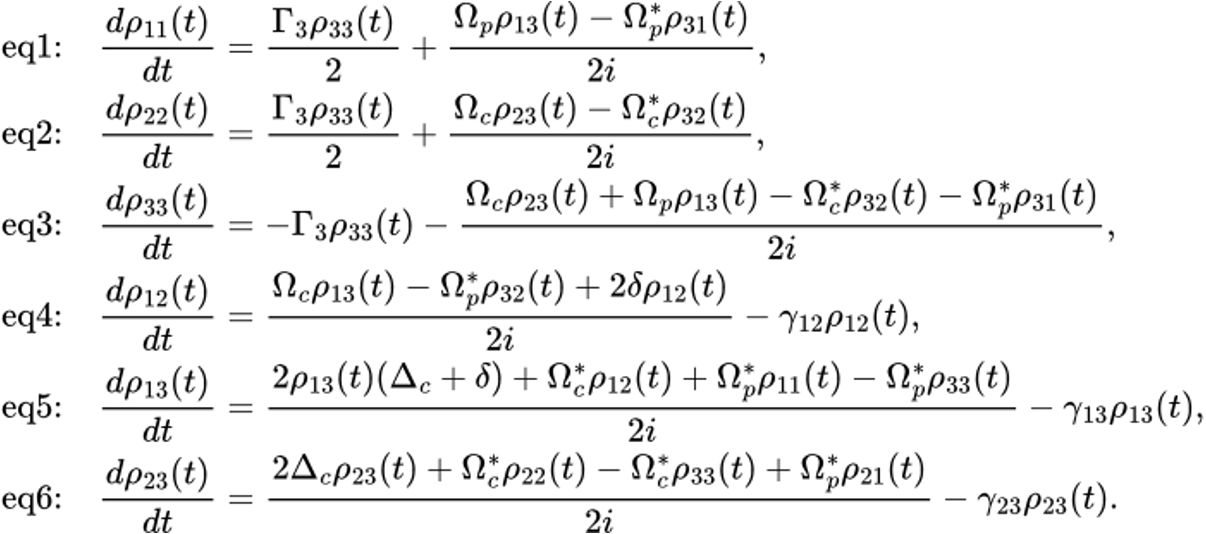

### Importing all necessary libraries
the system of steady state density matrix equations are solved using scipy.optimize

In [2]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image
from IPython.display import display

### Constant Definitions

In [3]:
# Constants
epsilon_0 = 8.854e-12  # Vacuum permittivity (F/m)
hbar = 1.054e-34       # Reduced Planck's constant (J·s)
mu_13 = 1.932e-29      # Dipole moment between states |1> and |3> (C·m)
N = 7e8                # Atomic number density for cold atoms the N is higher

Gamma3 = 2 * np.pi * 6   # (MHz)
Gamma31 = 5/9 * Gamma3   # Decay from level 3 to level 1 (MHz)
Gamma32 = 4/9 * Gamma3   # Decay from level 3 to level 2 (MHz)
Gamma12 = Gamma21 = 0    # Decay rates between levels 1 and 2 (MHz)
gamma13 = (Gamma3 + Gamma12)/2  # Decoherence rate between levels 1 and 3 (MHz)
gamma23 = (Gamma3 + Gamma21)/2  # Decoherence rate between levels 2 and 3 (MHz)
gamma12 = 0.001 * Gamma3        # Decoherence rate between ground states (MHz)

w_p = 2 * np.pi * 3e8 / 795e-9
k_0 = w_p / 3e8
L = 0.1

In [4]:
epsilon_0 = 8.854e-12  # Vacuum permittivity (F/m)
hbar = 1.054e-34       # Reduced Planck's constant (J·s)
mu_13 = mu_23 = 2.5377e-29      # Dipole moment between states (|1> and |3>) and (|1> and |3>) (C·m)

Gamma3 = 2 * np.pi * 6   # (GHz)
Gamma31 = 5/9 * Gamma3   # Decay from level 3 to level 1 (GHz)
Gamma32 = Gamma23 = 4/9 * Gamma3   # Decay from level 3 to level 2 (GHz)
Gamma12 = Gamma21 = 0.05 * Gamma3    # Decay rates between levels 1 and 2 (GHz)
gamma13 = (Gamma3 + Gamma12)/2  # Decoherence rate between levels 1 and 3 (GHz)
gamma23 = (Gamma3 + Gamma21)/2  # Decoherence rate between levels 2 and 3 (GHz)
gamma12 = (Gamma12 + Gamma21)/2     # Decoherence rate between ground states (GHz)

w_1 = 2 * np.pi * 3e8 / 795e-9
k_0 = w_1 / 3e8
L = 0.02        # Length in meters
z = 0.00001    # Step size in meters

OD_0 = 10
Gamma3_in_Hz = Gamma3 * 1e6

factor = ((4 * np.pi * mu_13**2 * L) / (Gamma3_in_Hz * hbar * epsilon_0 * 795e-9))
N = OD_0 / factor
# N = 3.46e16
# OD_01 = N1 * factor

print("{:.2e}".format(N))
# print("{:.2e}".format(N1))
# print("{:.2e}".format(OD_01))

1.73e+15


In [13]:
Transparency_Omega_1 = None
Transparency_Omega_2 = None
Om_2_list_adapted = None

# Constants
epsilon_0 = 8.854e-12  # Vacuum permittivity (F/m)
hbar = 1.054e-34       # Reduced Planck's constant (J·s)
mu_13 = 1.366e-29     # Dipole moment between states (|1> and |3>) (C·m)
mu_23 = 1.058e-29     # Dipole moment between states (|2> and |3>) (C·m)
c = 3e8

Gamma3 = 2 * np.pi * 6   # (MHz)
Gamma31 = 0.5 * Gamma3   # Decay from level 3 to level 1 (MHz)
Gamma32 = Gamma23 = 0.5 * Gamma3   # Decay from level 3 to level 2 (MHz)

# in the ideal case, there will be no Gamma12 and Gamma21 since there will be minimum collision 
# therefore there will be minimum population transfer between the two ground states
Gamma12 = Gamma21 = 0 * Gamma3    # Decay rates between levels 1 and 2 (MHz)

# Decoherence terms
gamma13 = (Gamma3 + Gamma12)/2  # Decoherence rate between levels 1 and 3 (MHz)
gamma23 = (Gamma3 + Gamma21)/2  # Decoherence rate between levels 2 and 3 (MHz)
# In this case is the gamma12 also zero?
gamma12 = 0   # Decoherence rate between ground states (MHz)

w_1 = 2 * np.pi * 3.771120414e14
w_2 = 2 * np.pi * 3.771052067e14
k_1 = w_1 / 3e8
k_2 = w_2 / 3e8
L = 0.02        # Length in meters
z = 0.0001    # Step size in meters

OD_0 = 10
N = OD_0 / ((4 * np.pi * mu_13**2 * L) / (Gamma3 * 10**6 * hbar * epsilon_0 * 795e-9))

print("Atomic Density (OD0={:.2f}) = {:.2e}".format(OD_0, N))

w_p = 2 * np.pi * 3e8 / 795e-9
k_0 = w_p / 3e8

Atomic Density (OD0=10.00) = 5.96e+15


# Analytical solution

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display

# Class to store simulation state
class SimulationState:
    def __init__(self):
        self.saved_Om_p = None
        self.saved_delta_p = None
        self.saved_delta_c = None
        self.saved_transparency = None

    def save_values(self, Om_p, delta_p, delta_c, T_1_values):
        self.saved_Om_p = Om_p
        self.saved_delta_p = delta_p
        self.saved_delta_c = delta_c
        self.saved_transparency = T_1_values

# Create an instance of SimulationState
simulation_state = SimulationState()

# Backend function to calculate OD based on user input
def calculate_OD_1(Om_p=1.0, delta_p=0.0, delta_c=0.0):
    Om_c_list = np.linspace(0.0001, 50, 1000)  # Coupling Rabi frequency range (MHz)

    # Initialize list to store OD values
    OD_values = []
    T_1_values = []

    for Om_c_scaled in Om_c_list:
        Om_c_actual = Om_c_scaled * Gamma3      # Convert to actual Omega_c in MHz
        Om_p_actual = Om_p * Gamma3             # Convert Om_p to MHz
        delta_p_actual = delta_p * Gamma3
        delta_c_actual = delta_c * Gamma3

        numerator = 2 * Om_p_actual * (delta_p_actual - delta_c_actual + 1j * gamma12)
        denominator = (Om_c_actual * np.conj(Om_c_actual) - 4 * (delta_p_actual - delta_c_actual + 1j * gamma12) * (delta_p_actual + 1j * gamma13))
        rho31 = numerator / denominator

        # Calculate chi
        chi = (2 * N * rho31 * mu_13**2) / (epsilon_0 * hbar * Om_p_actual)

        # Calculate OD
        OD = k_0 * np.imag(chi) * L
        OD_values.append(OD)

        # Calculate the transparency
        T_1 = np.exp(-OD)
        T_1_values.append(T_1)

    return Om_c_list, OD_values, T_1_values

# Function to plot the OD with reduced jitter
def plot_OD(Om_p, delta_p, delta_c):
    Om_c_list, OD_values, T_1_values = calculate_OD_1(Om_p, delta_p, delta_c)

    # Plot OD vs Omega_c
    plt.figure(figsize=(8, 6))
    plt.plot(Om_c_list, T_1_values, label='$e^{-OD}$ vs $\Omega_c/\Gamma_3$', color='blue')
    plt.xlabel('Coupling Rabi Frequency $\Omega_c/\Gamma_3$ (dimensionless)')
    plt.ylabel('Transparency ($e^{-OD}$)')
    plt.title(f'Transparency vs $\Omega_c/ \Gamma_3$ for $\Omega_p/\Gamma_3$={Om_p}, $\delta_p/\Gamma_3$={delta_p}, $\delta_c/\Gamma_3$={delta_c}')
    plt.grid(True)
    plt.show()

# Adjust slider description width specifically
slider_layout = widgets.Layout(width='800px')  # Adjust slider width if needed
description_layout = widgets.Layout(width='150px')  # Adjust description width

# Interactive sliders for Om_p, delta_p, delta_c with wider description layout
Om_p_slider = widgets.FloatSlider(
    value=0.001, min=0.000001, max=3.0, step=0.001,
    description='Omega_p / Gamma3', layout=slider_layout,
    style={'description_width': '150px'}  # This sets description width
)

delta_p_slider = widgets.FloatSlider(
    value=0.0, min=-0.3, max=0.3, step=0.001,
    description='delta_p / Gamma3', layout=slider_layout,
    style={'description_width': '150px'}  # Adjust description width
)

delta_c_slider = widgets.FloatSlider(
    value=0.0, min=-0.3, max=0.3, step=0.001,
    description='delta_c / Gamma3', layout=slider_layout,
    style={'description_width': '150px'}  # Adjust description width
)

# Use interact_manual to minimize automatic replotting and reduce jitter
interactive_plot = widgets.interactive_output(plot_OD, {
    'Om_p': Om_p_slider,
    'delta_p': delta_p_slider,
    'delta_c': delta_c_slider
})

# Create a save button
save_button = widgets.Button(
    description='Save Values',
    disabled=False,
    button_style='primary',
    tooltip='Save current values',
    icon='save'
)

def save_values(Om_p, delta_p, delta_c):
    Om_c_list, OD_values, T_1_values = calculate_OD_1(Om_p, delta_p, delta_c)
    simulation_state.save_values(Om_p, delta_p, delta_c, T_1_values)
    print("Saved Values:")
    print("Om_p:", simulation_state.saved_Om_p)
    print("delta_p:", simulation_state.saved_delta_p)
    print("delta_c:", simulation_state.saved_delta_c)
    print("Transparency:", simulation_state.saved_transparency)

save_button.on_click(lambda b: save_values(Om_p_slider.value, delta_p_slider.value, delta_c_slider.value))

# Display all widgets together
display(widgets.VBox([Om_p_slider, delta_p_slider, delta_c_slider, save_button, interactive_plot]))


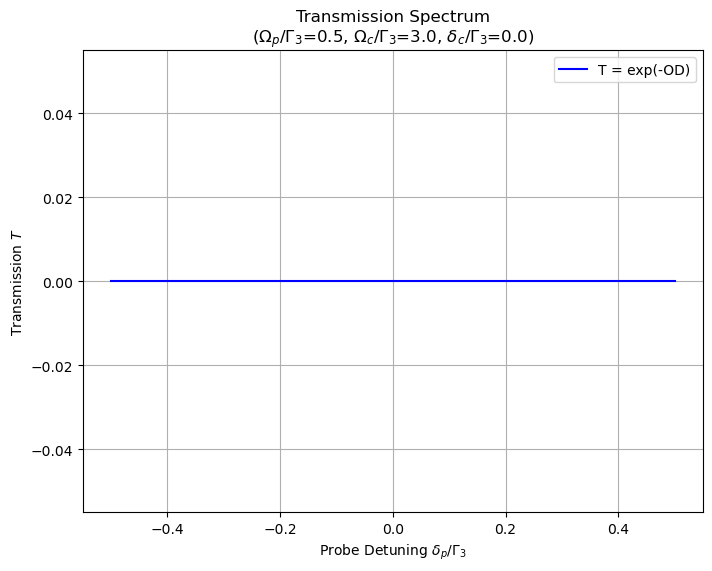

In [26]:
import numpy as np
import matplotlib.pyplot as plt

###############################################################################
# 1. Global Constants / Parameters (placeholders; please replace with yours)   #
###############################################################################
Gamma3    = 1.0         # Radiative decay rate (for dimensionless scaling)
gamma12   = 0.5         # Dephasing/decay rate for |1> <-> |2>
gamma13   = 0.5         # Dephasing/decay rate for |1> <-> |3>
N         = 1.0e12      # Atom number density
mu_13     = 3.0e-29     # Dipole matrix element (C·m)
epsilon_0 = 8.854e-12   # Permittivity of free space
hbar      = 1.054e-34   # Reduced Planck's constant
k_0       = 2*np.pi / (780e-9)  # wave number, e.g. for ~780 nm
L         = 0.01        # Medium length (m)

###############################################################################
# 2. Function to calculate OD while sweeping the probe detuning delta_p
###############################################################################
def calculate_OD_spectrum(
    Om_p=1.0,      # dimensionless \Omega_p / \Gamma3
    Om_c=1.0,      # dimensionless \Omega_c / \Gamma3
    delta_c=0.0,   # dimensionless \delta_c / \Gamma3
    delta_p_min=-0.3,
    delta_p_max=0.3,
    steps=300
):
    """
    Sweeps over probe detuning delta_p in [delta_p_min, delta_p_max] (dimensionless).
    Returns:
      - delta_p_list (array): detuning values in units of \Gamma3
      - OD_values    (array): optical depth at each detuning
      - T_values     (array): transmission T = exp(-OD) at each detuning
    """

    # Generate array of probe detuning values (dimensionless)
    delta_p_list = np.linspace(delta_p_min, delta_p_max, steps)

    # Convert dimensionless parameters to physical units
    Om_p_actual    = Om_p * Gamma3
    Om_c_actual    = Om_c * Gamma3
    delta_c_actual = delta_c * Gamma3

    OD_values = []
    T_values  = []

    # Loop over each detuning dp in the chosen range
    for dp in delta_p_list:
        delta_p_actual = dp * Gamma3

        # Numerator and denominator for rho31
        numerator = 2 * Om_p_actual * (delta_p_actual - delta_c_actual + 1j * gamma12)
        denominator = (
            Om_c_actual**2
            - 4 * (delta_p_actual - delta_c_actual + 1j * gamma12) 
                  * (delta_p_actual + 1j * gamma13)
        )
        rho31 = numerator / denominator

        # Susceptibility
        chi = (2 * N * rho31 * mu_13**2) / (epsilon_0 * hbar * Om_p_actual)

        # Optical depth
        OD = k_0 * np.imag(chi) * L
        OD_values.append(OD)

        # Transmission
        T_values.append(np.exp(-OD))

    return delta_p_list, np.array(OD_values), np.array(T_values)

###############################################################################
# 3. Define the parameters we want to use (dimensionless) and plot
###############################################################################
# Example parameter choices (dimensionless):
Om_p      = 0.5   # \Omega_p / \Gamma3
Om_c      = 3.0   # \Omega_c / \Gamma3
delta_c   = 0.0   # \delta_c / \Gamma3
dp_min    = -0.5  # min \delta_p
dp_max    =  0.5  # max \delta_p
steps     = 300   # number of points in the detuning sweep

# Call the function to compute OD and T vs. detuning
delta_p_list, OD_values, T_values = calculate_OD_spectrum(
    Om_p=Om_p,
    Om_c=Om_c,
    delta_c=delta_c,
    delta_p_min=dp_min,
    delta_p_max=dp_max,
    steps=steps
)

###############################################################################
# 4. Plot Transmission Spectrum T = e^{-OD} vs. probe detuning \delta_p
###############################################################################
plt.figure(figsize=(8,6))
plt.plot(delta_p_list, T_values, label='T = exp(-OD)', color='blue')
plt.xlabel(r'Probe Detuning $\delta_p / \Gamma_3$')
plt.ylabel('Transmission $T$')
plt.title(
    f'Transmission Spectrum\n'
    f'($\\Omega_p/\\Gamma_3$={Om_p}, $\\Omega_c/\\Gamma_3$={Om_c}, $\\delta_c/\\Gamma_3$={delta_c})'
)
plt.grid(True)
plt.legend()
plt.show()


Sweeping $\delta_p$ and $\delta_c$ for the analytical case

/var/folders/5c/wxkzc1014j39gxn5lgfcb6480000gp/T/ipykernel_1642/2875168783.py:19: RuntimeWarning: invalid value encountered in scalar divide
  rho31 = numerator / denominator


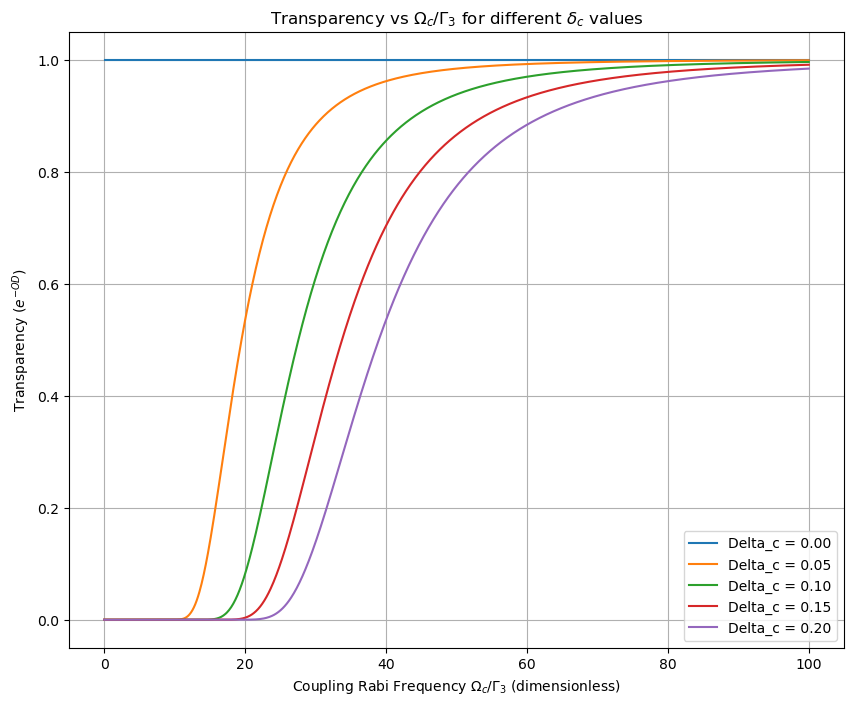

In [21]:
import numpy as np
import matplotlib.pyplot as plt

gamma12 = 0

# Function to calculate OD and transparency
def calculate_transparency(Om_p, delta_p, delta_c):
    Om_c_list = np.linspace(0, 100, 1000)  # Coupling Rabi frequency range (MHz)
    T_1_values = []

    for Om_c_scaled in Om_c_list:
        Om_c_actual = Om_c_scaled * Gamma3      # Convert to actual Omega_c in MHz
        Om_p_actual = Om_p * Gamma3             # Convert Om_p to MHz
        delta_p_actual = delta_p * Gamma3
        delta_c_actual = delta_c * Gamma3

        numerator = 2 * Om_p_actual * (delta_p_actual - delta_c_actual + 1j * gamma12)
        denominator = (Om_c_actual * np.conj(Om_c_actual) - 4 * (delta_p_actual - delta_c_actual + 1j * gamma12) * (delta_p_actual + 1j * gamma13))
        rho31 = numerator / denominator

        # Calculate chi
        chi = (2 * N * rho31 * mu_13**2) / (epsilon_0 * hbar * Om_p_actual)

        # Calculate OD
        OD = k_0 * np.imag(chi) * L

        # Calculate the transparency
        T_1 = np.exp(-OD)
        T_1_values.append(T_1)

    return Om_c_list, T_1_values

# Parameters
Om_p = 0.001
delta_p = 0.0

# Sweep delta_c from 0 to 0.2
delta_c_values = np.linspace(0, 0.2, 5)  # Adjust the number of steps as needed

# Plot all transparency curves
plt.figure(figsize=(10, 8))

for delta_c in delta_c_values:
    Om_c_list, T_1_values = calculate_transparency(Om_p, delta_p, delta_c)
    plt.plot(Om_c_list, T_1_values, label=f'Delta_c = {delta_c:.2f}')

plt.xlabel('Coupling Rabi Frequency $\Omega_c/\Gamma_3$ (dimensionless)')
plt.ylabel('Transparency ($e^{-OD}$)')
plt.title('Transparency vs $\Omega_c/ \Gamma_3$ for different $\delta_c$ values')
plt.legend()
plt.grid(True)
plt.show()

Sweeping the 

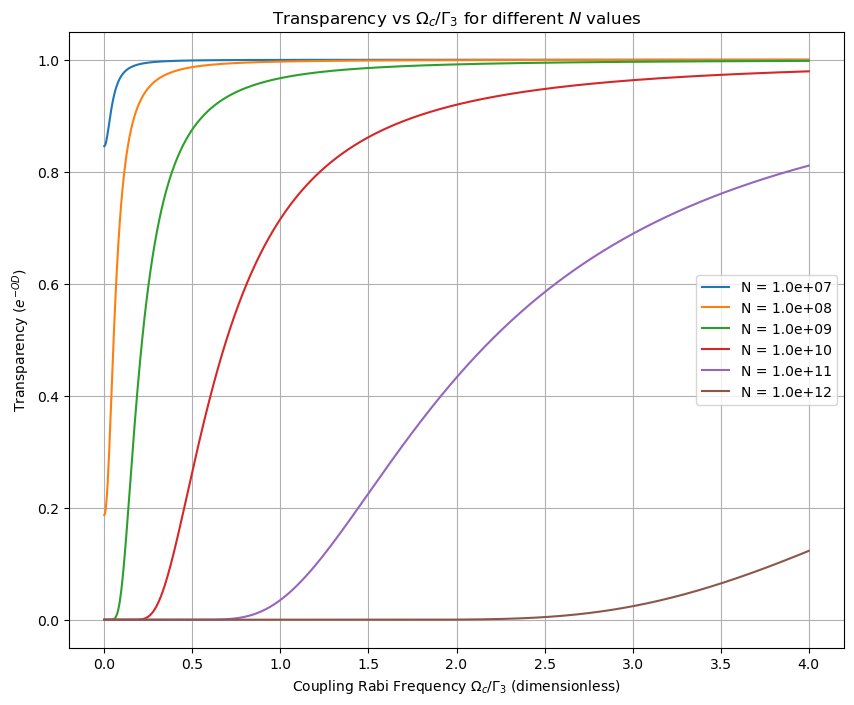

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon_0 = 8.854e-12  # Vacuum permittivity (F/m)
hbar = 1.054e-34       # Reduced Planck's constant (J·s)
mu_13 = 1.932e-29      # Dipole moment between states |1> and |3> (C·m)

Gamma3 = 2 * np.pi * 6   # (MHz)
Gamma31 = 5/9 * Gamma3   # Decay from level 3 to level 1 (MHz)
Gamma32 = 4/9 * Gamma3   # Decay from level 3 to level 2 (MHz)
Gamma12 = Gamma21 = 0    # Decay rates between levels 1 and 2 (MHz)
gamma13 = (Gamma3 + Gamma12)/2  # Decoherence rate between levels 1 and 3 (MHz)
gamma23 = (Gamma3 + Gamma21)/2  # Decoherence rate between levels 2 and 3 (MHz)
gamma12 = 0.001 * Gamma3        # Decoherence rate between ground states (MHz)

w_p = 2 * np.pi * 3e8 / 795e-9
k_0 = w_p / 3e8
L = 0.1

# Function to calculate OD and transparency
def calculate_transparency(Om_p, delta_p, delta_c, N):
    Om_c_list = np.linspace(0, 4, 1000)  # Coupling Rabi frequency range (MHz)
    T_1_values = []

    for Om_c_scaled in Om_c_list:
        Om_c_actual = Om_c_scaled * Gamma3      # Convert to actual Omega_c in MHz
        Om_p_actual = Om_p * Gamma3             # Convert Om_p to MHz
        delta_p_actual = delta_p * Gamma3
        delta_c_actual = delta_c * Gamma3

        numerator = 2 * Om_p_actual * (delta_p_actual - delta_c_actual + 1j * gamma12)
        denominator = (Om_c_actual * np.conj(Om_c_actual) - 4 * (delta_p_actual - delta_c_actual + 1j * gamma12) * (delta_p_actual + 1j * gamma13))
        rho31 = numerator / denominator

        # Calculate chi
        chi = (2 * N * rho31 * mu_13**2) / (epsilon_0 * hbar * Om_p_actual)

        # Calculate OD
        OD = k_0 * np.imag(chi) * L

        # Calculate the transparency
        T_1 = np.exp(-OD)
        T_1_values.append(T_1)

    return Om_c_list, T_1_values

# Parameters
Om_p = 0.001
delta_p = 0.0
delta_c = 0.0

# Sweep N from 1e7 to 1e12
N_values = np.logspace(7, 12, 6)  # Adjust the number of steps as needed

# Plot all transparency curves
plt.figure(figsize=(10, 8))

for N in N_values:
    Om_c_list, T_1_values = calculate_transparency(Om_p, delta_p, delta_c, N)
    plt.plot(Om_c_list, T_1_values, label=f'N = {N:.1e}')

plt.xlabel('Coupling Rabi Frequency $\Omega_c/\Gamma_3$ (dimensionless)')
plt.ylabel('Transparency ($e^{-OD}$)')
plt.title('Transparency vs $\Omega_c/ \Gamma_3$ for different $N$ values')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/5c/wxkzc1014j39gxn5lgfcb6480000gp/T/ipykernel_3029/2185330712.py:34: RuntimeWarning: invalid value encountered in scalar divide
  rho31 = numerator / denominator


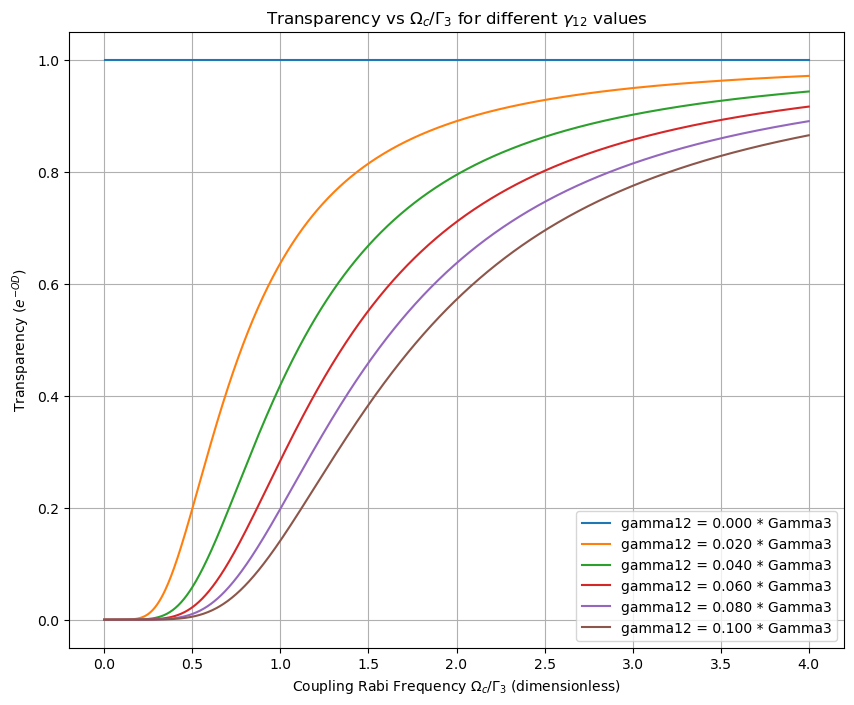

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon_0 = 8.854e-12  # Vacuum permittivity (F/m)
hbar = 1.054e-34       # Reduced Planck's constant (J·s)
mu_13 = 1.932e-29      # Dipole moment between states |1> and |3> (C·m)
N = 7e8                # Atomic number density for cold atoms the N is higher

Gamma3 = 2 * np.pi * 6   # (MHz)
Gamma31 = 5/9 * Gamma3   # Decay from level 3 to level 1 (MHz)
Gamma32 = 4/9 * Gamma3   # Decay from level 3 to level 2 (MHz)
Gamma12 = Gamma21 = 0    # Decay rates between levels 1 and 2 (MHz)
gamma13 = (Gamma3 + Gamma12)/2  # Decoherence rate between levels 1 and 3 (MHz)
gamma23 = (Gamma3 + Gamma21)/2  # Decoherence rate between levels 2 and 3 (MHz)

w_p = 2 * np.pi * 3e8 / 795e-9
k_0 = w_p / 3e8
L = 0.1

# Function to calculate OD and transparency
def calculate_transparency(Om_p, delta_p, delta_c, gamma12):
    Om_c_list = np.linspace(0, 4, 1000)  # Coupling Rabi frequency range (MHz)
    T_1_values = []

    for Om_c_scaled in Om_c_list:
        Om_c_actual = Om_c_scaled * Gamma3      # Convert to actual Omega_c in MHz
        Om_p_actual = Om_p * Gamma3             # Convert Om_p to MHz
        delta_p_actual = delta_p * Gamma3
        delta_c_actual = delta_c * Gamma3

        numerator = 2 * Om_p_actual * (delta_p_actual - delta_c_actual + 1j * gamma12)
        denominator = (Om_c_actual * np.conj(Om_c_actual) - 4 * (delta_p_actual - delta_c_actual + 1j * gamma12) * (delta_p_actual + 1j * gamma13))
        rho31 = numerator / denominator

        # Calculate chi
        chi = (2 * N * rho31 * mu_13**2) / (epsilon_0 * hbar * Om_p_actual)

        # Calculate OD
        OD = k_0 * np.imag(chi) * L

        # Calculate the transparency
        T_1 = np.exp(-OD)
        T_1_values.append(T_1)

    return Om_c_list, T_1_values

# Parameters
Om_p = 0.001
delta_p = 0.0
delta_c = 0.0

# Sweep gamma12 from 0.001 * Gamma3 to 0.1 * Gamma3
gamma12_values = np.linspace(0.00 * Gamma3, 0.1 * Gamma3, 6)  # Adjust the number of steps as needed

# Plot all transparency curves
plt.figure(figsize=(10, 8))

for gamma12 in gamma12_values:
    Om_c_list, T_1_values = calculate_transparency(Om_p, delta_p, delta_c, gamma12)
    plt.plot(Om_c_list, T_1_values, label=f'gamma12 = {gamma12/Gamma3:.3f} * Gamma3')

plt.xlabel('Coupling Rabi Frequency $\Omega_c/\Gamma_3$ (dimensionless)')
plt.ylabel('Transparency ($e^{-OD}$)')
plt.title('Transparency vs $\Omega_c/ \Gamma_3$ for different $\gamma_{12}$ values')
plt.legend()
plt.grid(True)
plt.show()

# Numerical Solution

In [ ]:
def equations(x, params):
    rho11, rho22, Re_rho12, Im_rho12, Re_rho13, Im_rho13, Re_rho23, Im_rho23 = x

    # Compute rho33
    rho33 = 1 - rho11 - rho22

    # Reconstruct complex variables
    rho12 = Re_rho12 + 1j * Im_rho12
    rho21 = np.conj(rho12)
    rho13 = Re_rho13 + 1j * Im_rho13
    rho31 = np.conj(rho13)
    rho23 = Re_rho23 + 1j * Im_rho23
    rho32 = np.conj(rho23)

    # Extract parameters
    Om_p, Om_c, Gamma12, Gamma21, Gamma31, Gamma32, gamma13, gamma23, gamma12, delta_p, delta_c = params

    Gamma3_total = Gamma31 + Gamma32  # Total decay rate of the excited state

    # Population equations steady state 
    # rho11 
    E1 = -1j / 2 * Om_p * rho13 + 1j / 2 * rho31 * np.conj(Om_p) + Gamma31 * rho33
    # rho22
    E2 = -1j / 2 * Om_c * rho23 + Gamma32 * rho33 + 1j / 2 * rho32 * np.conj(Om_c)
    # rho33
    E3 = 1j / 2 * (Om_p * rho13 + Om_c * rho23 + 2j *(Gamma31 + Gamma32) * rho33 - rho32 * np.conj(Om_c) - rho31 * np.conj(Om_p)) 

    # Coherence equations
    # rho12
    E4 = 1j / 2 * (2 * (delta_c - delta_p + 1j * gamma12) * rho12 - Om_c * rho13 + rho32 * np.conj(Om_p))
    # rho13
    E5 = -1j / 2 * (2 * (delta_p - 1j * gamma13) * rho13 + rho12 * np.conj(Om_c) + (rho11 - rho33) * np.conj(Om_p))
    # rho23
    E6 = -1j / 2 * (2 * (delta_c - 1j * gamma23) * rho23 + (rho22 - rho33) * np.conj(Om_c) + np.conj(Om_p) * rho21)

    # Split into real and imaginary parts
    equations = []
    for E in [E1, E2, E3, E4, E5, E6]:
        equations.append(np.real(E))
        equations.append(np.imag(E))

    return equations

# Constants
epsilon_0 = 8.854e-12  # Vacuum permittivity (F/m)
hbar = 1.054e-34       # Reduced Planck's constant (J·s)
mu_13 = 1.932e-29      # Dipole moment between states |1> and |3> (C·m)
N = 7e8               # Atomic number density (atoms/m^3)

Gamma3 = 2 * np.pi * 6   # (MHz)
Gamma31 = 5/9 * Gamma3   # Decay from level 3 to level 1 (MHz)
Gamma32 = 4/9 * Gamma3   # Decay from level 3 to level 2 (MHz)
Gamma12 = Gamma21 = 0  # Decay rates between levels 1 and 2 (MHz)
gamma13 = (Gamma3 + Gamma12)/2  # Decoherence rate between levels 1 and 3 (MHz)
gamma23 = (Gamma3 + Gamma21)/2  # Decoherence rate between levels 2 and 3 (MHz)
gamma12 = 0.001 * Gamma3 # Decoherence rate between ground states (MHz)

w_p = 2 * np.pi * 3e8 / 795e-9
k_0 = w_p / 3e8
L = 0.1        #In m

# Backend function to calculate OD based on user input
def calculate_OD_1(Om_p=1.0, delta_p=0.0, delta_c=0.0):
    Om_c_list = np.linspace(0, 4, 1000)  # Coupling Rabi frequency range (MHz)

    # Initialize list to store OD values
    OD_values = []
    T_1_values = []

    # Initial guess for the density matrix elements
    x0 = [1, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    for Om_c_scaled in Om_c_list:
        Om_c_actual = Om_c_scaled * Gamma3      # Convert to actual Omega_c in MHz
        Om_p_actual = Om_p * Gamma3      # Convert Om_p to MHz
        delta_p_actual = delta_p * Gamma3
        delta_c_actual = delta_c * Gamma3
        params = [Om_p_actual, Om_c_actual, Gamma12, Gamma21, Gamma31, Gamma32, gamma13, gamma23, gamma12, delta_p_actual, delta_c_actual]
        
        # Solve the equations
        res = least_squares(equations, x0, args=(params,), xtol=1e-10, max_nfev=10000)
        sol = res.x

        if not res.success:
            OD_values.append(np.nan)
            T_1_values.append(np.nan)
            continue

        rho11, rho22, Re_rho12, Im_rho12, Re_rho13, Im_rho13, Re_rho23, Im_rho23 = sol
        rho31 = Re_rho13 - 1j * Im_rho13

        # Calculate chi
        chi = (2 * N * rho31 * mu_13**2) / (epsilon_0 * hbar * Om_p_actual)

        # Calculate OD
        OD = k_0 * np.imag(chi) * L
        OD_values.append(OD)

        # Calculate the transparency
        T_1 = np.exp(-OD)
        T_1_values.append(T_1)

        # Update initial guess
        x0 = sol        

    return Om_c_list, OD_values, T_1_values

# Function to plot the OD
def plot_OD(Om_p, delta_p, delta_c):
    Om_c_list, OD_values, T_1_values = calculate_OD_1(Om_p, delta_p, delta_c)
    
    print(str(max(OD_values)))

    # Plot OD vs Omega_c
    plt.figure(figsize=(8, 6))
    plt.plot(Om_c_list, T_1_values, label='$e^{-OD}$ vs $\Omega_c/\Gamma_3$', color='blue')
    plt.xlabel('Coupling Rabi Frequency $\Omega_c/\Gamma_3$ (dimensionless)')
    plt.ylabel('Transparency ($e^{-OD}$)')
    plt.title(f'transparency vs $\Omega_c/ \Gamma_3$ for $\Omega_p/\Gamma_3$={Om_p}, $\delta_p/\Gamma_3$={delta_p}, $\delta_c/\Gamma_3$={delta_c}')
    plt.grid(True)
    plt.show()

# Adjust slider description width specifically
slider_layout = widgets.Layout(width='800px')  # Adjust slider width if needed
description_layout = widgets.Layout(width='150px')  # Adjust description width

# Interactive sliders for Om_p, delta_p, delta_c with wider description layout
Om_p_slider = widgets.FloatSlider(
    value=0.001, min=0.000001, max=1.0, step=0.01,
    description='Omega_p (MHz)', layout=slider_layout,
    style={'description_width': '150px'}  # This sets description width
)

delta_p_slider = widgets.FloatSlider(
    value=0.0, min=-0.3, max=0.3, step=0.01,
    description='delta_p (MHz)', layout=slider_layout,
    style={'description_width': '150px'}  # Adjust description width
)

delta_c_slider = widgets.FloatSlider(
    value=0.0, min=-0.3, max=0.3, step=0.01,
    description='delta_c (MHz)', layout=slider_layout,
    style={'description_width': '150px'}  # Adjust description width
)


# Use interactive to automatically update the plot when slider values change
interactive_plot = widgets.interactive(plot_OD, Om_p=Om_p_slider, delta_p=delta_p_slider, delta_c=delta_c_slider)

# Display the interactive sliders and plot
display(interactive_plot)

interactive(children=(FloatSlider(value=0.001, description='Omega_p (MHz)', layout=Layout(width='800px'), max=…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import ipywidgets as widgets
from IPython.display import display

def equations(x, params):
    rho11, rho22, Re_rho12, Im_rho12, Re_rho13, Im_rho13, Re_rho23, Im_rho23 = x

    # Compute rho33
    rho33 = 1 - rho11 - rho22

    # Reconstruct complex variables
    rho12 = Re_rho12 + 1j * Im_rho12
    rho21 = np.conj(rho12)
    rho13 = Re_rho13 + 1j * Im_rho13
    rho31 = np.conj(rho13)
    rho23 = Re_rho23 + 1j * Im_rho23
    rho32 = np.conj(rho23)

    # Extract parameters
    Om_p, Om_c, Gamma12, Gamma21, Gamma31, Gamma32, gamma13, gamma23, gamma12, delta_p, delta_c = params

    Gamma3_total = Gamma31 + Gamma32  # Total decay rate of the excited state

    # Population equations steady state 
    # rho11 
    E1 = -1j / 2 * Om_p * rho13 + 1j / 2 * rho31 * np.conj(Om_p) + Gamma31 * rho33
    # rho22
    E2 = -1j / 2 * Om_c * rho23 + Gamma32 * rho33 + 1j / 2 * rho32 * np.conj(Om_c)
    # rho33
    E3 = 1j / 2 * (Om_p * rho13 + Om_c * rho23 + 2j *(Gamma31 + Gamma32) * rho33 - rho32 * np.conj(Om_c) - rho31 * np.conj(Om_p)) 

    # Coherence equations
    # rho12
    E4 = 1j / 2 * (2 * (delta_c - delta_p + 1j * gamma12) * rho12 - Om_c * rho13 + rho32 * np.conj(Om_p))
    # rho13
    E5 = -1j / 2 * (2 * (delta_p - 1j * gamma13) * rho13 + rho12 * np.conj(Om_c) + (rho11 - rho33) * np.conj(Om_p))
    # rho23
    E6 = -1j / 2 * (2 * (delta_c - 1j * gamma23) * rho23 + (rho22 - rho33) * np.conj(Om_c) + np.conj(Om_p) * rho21)

    # Split into real and imaginary parts
    equations = []
    for E in [E1, E2, E3, E4, E5, E6]:
        equations.append(np.real(E))
        equations.append(np.imag(E))

    return equations

# Constants
epsilon_0 = 8.854e-12  # Vacuum permittivity (F/m)
hbar = 1.054e-34       # Reduced Planck's constant (J·s)
mu_13 = 1.932e-29      # Dipole moment between states |1> and |3> (C·m)
N = 1e7                # Atomic number density (normalized units)

Gamma3 = 2 * np.pi * 6   # (MHz)
Gamma31 = 5/9 * Gamma3   # Decay from level 3 to level 1 (MHz)
Gamma32 = 4/9 * Gamma3   # Decay from level 3 to level 2 (MHz)
Gamma12 = Gamma21 = 0  # Decay rates between levels 1 and 2 (MHz)
gamma13 = (Gamma3 + Gamma12)/2  # Decoherence rate between levels 1 and 3 (MHz)
gamma23 = (Gamma3 + Gamma21)/2  # Decoherence rate between levels 2 and 3 (MHz)
gamma12 = 0 # Decoherence rate between ground states (MHz)

w_p = 2 * np.pi * 3e8 / 795e-9
k_0 = w_p / 3e8
L = 0.05

# Backend function to calculate OD based on user input
def calculate_OD_2(Om_p=1.0, Om_c=1.0, delta_c=0.0):
    delta_p_list = np.linspace(-100.0, 100.0, 500)  # Detuning range (MHz)

    # Initialize list to store OD values
    OD_values = []
    T_1_values = []

    # Initial guess for the density matrix elements
    x0 = [0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    for delta_p in delta_p_list:
        params = [Om_p, Om_c, Gamma12, Gamma21, Gamma31, Gamma32, gamma13, gamma23, gamma12, delta_p, delta_c]
        
        # Solve the equations
        res = least_squares(equations, x0, args=(params,), xtol=1e-8, max_nfev=10000)
        sol = res.x

        if not res.success:
            OD_values.append(np.nan)
            continue

        rho11, rho22, Re_rho12, Im_rho12, Re_rho13, Im_rho13, Re_rho23, Im_rho23 = sol
        rho31 = Re_rho13 - 1j * Im_rho13

        # Calculate chi
        chi = (2 * N * rho31 * mu_13**2) / (epsilon_0 * hbar * Om_p)

        # Calculate OD
        OD = k_0 * np.imag(chi) * L
        OD_values.append(OD)

        # Calculate the transparency
        T_1 = np.exp(-OD)
        T_1_values.append(T_1)

        # Update initial guess
        x0 = sol

    return delta_p_list, OD_values, T_1_values

# Function to plot the OD
def plot_OD(Om_p, Om_c, delta_c):
    delta_p_list, OD_values, T_1_values = calculate_OD_2(Om_p, Om_c, delta_c)

    # Plot OD vs delta_p
    plt.figure(figsize=(8, 6))
    plt.plot(delta_p_list, T_1_values, label='$e^{-OD}$ vs $\delta_p$', color='blue')
    plt.xlabel('Detuning $\delta_p$ (MHz)')
    plt.ylabel('Transparency ($e^{-OD}$)')
    plt.title(f'Transparency vs $\delta_p$ for $\Omega_p$={Om_p} MHz, $\Omega_c$={Om_c} MHz, $\delta_c$={delta_c} MHz')
    plt.grid(True)
    plt.show()

# Adjust slider description width specifically
slider_layout = widgets.Layout(width='800px')  # Adjust slider width if needed
description_layout = widgets.Layout(width='150px')  # Adjust description width

# Interactive sliders for Om_p, Om_c, delta_c with wider description layout
Om_p_slider = widgets.FloatSlider(
    value=1.0, min=-Gamma3, max=Gamma3, step=0.0001,
    description='Omega_p (MHz)', layout=slider_layout,
    style={'description_width': '150px'}  # This sets description width
)

Om_c_slider = widgets.FloatSlider(
    value=1.0, min=-Gamma3 * 10, max=Gamma3 * 10, step=0.001,
    description='Omega_c (MHz)', layout=slider_layout,
    style={'description_width': '150px'}  # Adjust description width
)

delta_c_slider = widgets.FloatSlider(
    value=0.0, min=-Gamma3 * 10, max=Gamma3 * 10, step=0.1,
    description='delta_c (MHz)', layout=slider_layout,
    style={'description_width': '150px'}  # Adjust description width
)

# Use interactive to automatically update the plot when slider values change
interactive_plot = widgets.interactive(plot_OD, Om_p=Om_p_slider, Om_c=Om_c_slider, delta_c=delta_c_slider)

# Display the interactive sliders and plot
display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='Omega_p (MHz)', layout=Layout(width='800px'), max=37…